In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import flopy
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
config = {'font.family': 'Arial',
          'font.size': 12,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'mathtext.fontset': 'stix',
          'savefig.dpi': 300
         }
plt.rcParams.update(config)

# Read mf6pqc results pH Cl Mg Ca Calcite Dolomite
mf6pqc_data = np.load("./output/results.npy")
print(mf6pqc_data.shape)

# Read pht3d results [Ca Mg Cl pH Calcite Dolomite]
pht3d_calicite = np.load("./input_data/npy_outputs/results_calcite.npy")
print(pht3d_calicite.shape)
pht3d_ca = np.load("./input_data/npy_outputs/results_ca.npy")
print(pht3d_ca.shape)
pht3d_siderite = np.load("./input_data/npy_outputs/results_siderite.npy")
print(pht3d_siderite.shape)


(193, 12, 80)
(25, 1, 1, 80)
(25, 1, 1, 80)
(25, 1, 1, 80)


In [33]:
pht3d_calicite[6].shape

(1, 1, 80)

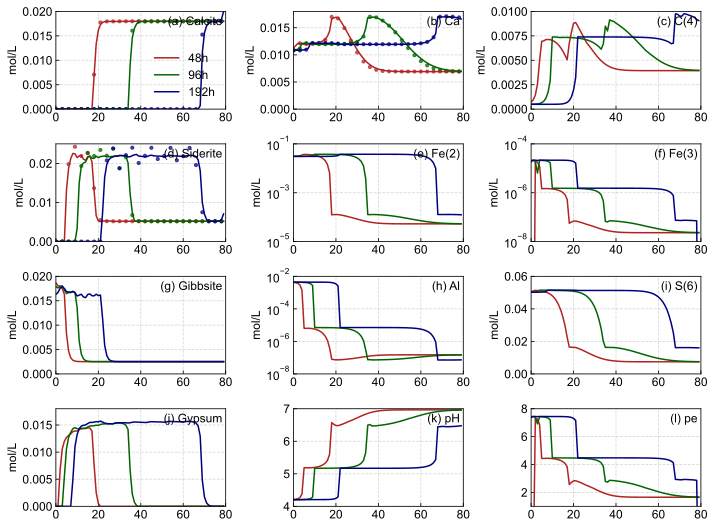

In [51]:
import matplotlib.pyplot as plt

# 准备数据
log_maps = {
    48: mf6pqc_data[47].reshape(12, 80),
    96: mf6pqc_data[95].reshape(12, 80),
    192: mf6pqc_data[-1].reshape(12, 80),
}
times = [48, 96, 192]
colors = {48: "#b22222", 96: "#006400", 192: "#000080"}

# 指标配置：(行索引, 标题, 缩放因子, yscale, ylims)
metrics = [
    (2,  "Calcite", 0.35,    None,      (0.0, 0.02)),
    (3,  "Ca",      1.0,     None,      (0.0, 0.018)),
    (4,  "C(4)",    1.0,     None,      (0.0, 0.010)),
    (5,  "Siderite",0.35,    None,      (0.0, 0.0250)),
    (6,  "Fe(2)",   1.0,     "log",     (1e-5, 1e-1)),
    (7,  "Fe(3)",   1.0,     "log",     (1e-8, 1e-4)),
    (8,  "Gibbsite",0.35,    None,      (0.0, 0.02)),
    (9,  "Al",      1.0,     "log",     (1e-8, 1e-2)),
    (10, "S(6)",    1.0,     None,      (0.0, 0.06)),
    (11, "Gypsum",  0.35,    None,      (0.0, 0.018)),
    (0,  "pH",      1.0,     None,      (4.0, 7.0)),
    (1,  "pe",      1.0,     None,      (1.0, 8.0)),
]

fig, axes = plt.subplots(4, 3, figsize=(10, 7.5))
axes = axes.flatten()

# 英文字母标签序列
labels = [f"({chr(ord('a')+i)})" for i in range(len(axes))]

for i, ((idx, title, scale, yscale, ylims), ax) in enumerate(zip(metrics, axes)):
    # 绘制各时间点数据
    for t in times:
        data = log_maps[t][idx, :] / scale
        x = range(data.size)
        ax.plot(x, data, c=colors[t], label=f"{t}h")
    if title == 'Calcite':
        ax.scatter(np.arange(80)[::3], pht3d_calicite[6, 0 , 0][::3]/ scale, c=colors[48], marker='o', s=10, alpha=0.7)
        ax.scatter(np.arange(80)[::3], pht3d_calicite[12, 0 , 0][::3]/ scale, c=colors[96], marker='o', s=10, alpha=0.7)
        ax.scatter(np.arange(80)[::3], pht3d_calicite[24, 0 , 0][::3]/ scale, c=colors[192], marker='o', s=10, alpha=0.7)
    if title == 'Ca':
        ax.scatter(np.arange(80)[::3], pht3d_ca[6, 0 , 0][::3]/ scale, c=colors[48], marker='o', s=10, alpha=0.7)
        ax.scatter(np.arange(80)[::3], pht3d_ca[12, 0 , 0][::3]/ scale, c=colors[96], marker='o', s=10, alpha=0.7)
        ax.scatter(np.arange(80)[::3], pht3d_ca[24, 0 , 0][::3]/ scale, c=colors[192], marker='o', s=10, alpha=0.7)
    if title == 'Siderite':
        ax.scatter(np.arange(80)[::3], pht3d_siderite[6, 0 , 0][::3]/ scale, c=colors[48], marker='o', s=10, alpha=0.7)
        ax.scatter(np.arange(80)[::3], pht3d_siderite[12, 0 , 0][::3]/ scale, c=colors[96], marker='o', s=10, alpha=0.7)
        ax.scatter(np.arange(80)[::3], pht3d_siderite[24, 0 , 0][::3]/ scale, c=colors[192], marker='o', s=10, alpha=0.7)

    # 在子图内显示序号和标题，放置在右上角
    label = f"{labels[i]} {title}"
    ax.text(
        0.98, 0.95, label,
        transform=ax.transAxes,
        fontsize=12,
        va='top', ha='right',
    )

    # 设置坐标轴和网格
    if yscale:
        ax.set_yscale(yscale)
    ax.set_ylim(*ylims)
    ax.set_xlim(0, 80)
    
    # 仅对前 10 个指标（即除最后两个 pH 和 pe 外）添加 y 轴标签
    if i < len(metrics) - 2:
        ax.set_ylabel("mol/L")
    
    if title == "Calcite":
        ax.legend(frameon=False)
    ax.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle='--')
    ax.set_axisbelow(True)

plt.tight_layout()
plt.show()
